# Notebook Setup and Basic Data Inspection

## Notebook Setup and Loading Data

In [ ]:
from google.colab import drive

drive.mount('/content/drive') # Remember to add the folder (as a shortcut) to your drive before running this cell
%cd /content/drive/MyDrive/PROJECT_CS547_IE534

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1ebKvoK7afoaMA3BiVP8gBiRPCDUjeorO/PROJECT_CS547_IE534


In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os

In [ ]:
# Set random seeds
random.seed(42)
np.random.seed(42)

In [ ]:
# Load datasets
weather_data = pd.read_csv('../Milestone_1/2023_weather.csv', low_memory=False)
weather_explained = pd.read_csv('../Milestone_1/weather_explained.txt', sep=' - ', header=None, engine='python')
weather_explained.columns = ['Code', 'Description']

debug_dataset = pd.read_pickle('../Milestone_1/debug_dataset.pkl')
training_data_with_onehot = pd.read_pickle('../Milestone_1/training_data_with_onehot.pkl')
training_data_without_onehot = pd.read_pickle('../Milestone_1/training_data_without_onehot.pkl')

print("Datasets loaded successfully.")

Datasets loaded successfully.


# Basic Data Inspection

In [ ]:
# Display general information about the debug dataset
print("Debug Dataset Info:")
debug_dataset.info()

Debug Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 7517 to 21973
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rideable_type       60000 non-null  object        
 1   started_at          60000 non-null  datetime64[ns]
 2   Month               60000 non-null  object        
 3   Day_of_Week         60000 non-null  object        
 4   Exact_start_Time    60000 non-null  object        
 5   ended_at            60000 non-null  datetime64[ns]
 6   duration            60000 non-null  float64       
 7   start_station_name  60000 non-null  object        
 8   end_station_name    60000 non-null  object        
 9   start_lat           60000 non-null  float64       
 10  start_lng           60000 non-null  float64       
 11  end_lat             60000 non-null  float64       
 12  end_lng             60000 non-null  float64       
 13  member_casual       60000 no

Upon basic inspection of the debug dataset information, we can see that there are a total of **19 columns** and **60000 rows**. The weather attributes seem to have some null values that need to be handled. The rest of the columns do not have null values and all the columns are stored in appropriate datatype formats.

In [ ]:
# Display the first few rows of the dataset
print("\nPreview of the Debug Dataset:")
display(debug_dataset.head())


Preview of the Debug Dataset:


,rideable_type,started_at,Month,Day_of_Week,Exact_start_Time,ended_at,duration,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,Weather_PRCP,Weather_AVG_WIND,Weather_TMAX,Weather_TMIN,Weather_SNOW
7517,classic_bike,2023-01-09 18:45:11.355,January,Monday,18:45:11.355000,2023-01-09 18:52:51.173,459.818,Broadway & W 56 St,E 54 St & 1 Ave,40.765265,-73.981923,40.756265,-73.964179,member,0.01,4.47,44.0,37.0,0.0
13706,classic_bike,2023-01-24 21:59:02.412,January,Tuesday,21:59:02.412000,2023-01-24 22:01:46.344,163.932,Kingston Ave & Herkimer St,MacDonough St & Marcy Ave,40.678907,-73.941428,40.680780,-73.946130,member,0.23,NaN,NaN,NaN,0.0
28386,classic_bike,2023-01-06 05:36:46.608,January,Friday,05:36:46.608000,2023-01-06 05:53:27.805,1001.197,6 Ave & Broome St,Broadway & W 48 St,40.724310,-74.004730,40.760177,-73.984868,member,0.34,0.89,57.0,57.0,0.0
10032,classic_bike,2023-01-17 09:32:14.431,January,Tuesday,09:32:14.431000,2023-01-17 10:00:05.335,1670.904,E 39 St & 2 Ave,W 17 St & 7 Ave,40.748033,-73.973828,40.740564,-73.998526,member,0.00,3.13,47.0,35.0,0.0
18672,classic_bike,2023-01-27 18:35:40.665,January,Friday,18:35:40.665000,2023-01-27 18:43:48.903,488.238,6 Ave & W 33 St,6 Ave & W 45 St,40.749013,-73.988484,40.756951,-73.982631,casual,0.00,5.82,44.0,35.0,0.0


In [ ]:
# Check for missing values
print("Missing Values in Debug Dataset:\n")
print(debug_dataset.isnull().sum())

Missing Values in Debug Dataset:

rideable_type             0
started_at                0
Month                     0
Day_of_Week               0
Exact_start_Time          0
ended_at                  0
duration                  0
start_station_name        0
end_station_name          0
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
Weather_PRCP            456
Weather_AVG_WIND      28720
Weather_TMAX          15910
Weather_TMIN          15844
Weather_SNOW           1652
dtype: int64


As expected, weather columns have considerable amount of missing values that need to be handled (will be done later in the notebook).

In [ ]:
# Check unique values for categorical columns
categorical_columns = ['rideable_type', 'Month', 'Day_of_Week',
                       'start_station_name', 'end_station_name', 'member_casual']
print("Unique Values in Categorical Columns:\n")
for col in categorical_columns:
    print(f"{col}: {debug_dataset[col].nunique()} unique values")

Unique Values in Categorical Columns:

rideable_type: 2 unique values
Month: 12 unique values
Day_of_Week: 7 unique values
start_station_name: 2041 unique values
end_station_name: 2008 unique values
member_casual: 2 unique values


In [ ]:
# Check summary statistics for numerical columns
numerical_columns = ['duration', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                     'Weather_PRCP', 'Weather_AVG_WIND', 'Weather_TMAX',
                     'Weather_TMIN', 'Weather_SNOW']
print("Summary Statistics for Numerical Columns:\n")
display(debug_dataset[numerical_columns].describe())

Summary Statistics for Numerical Columns:



,duration,start_lat,start_lng,end_lat,end_lng,Weather_PRCP,Weather_AVG_WIND,Weather_TMAX,Weather_TMIN,Weather_SNOW
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,59544.000000,31280.000000,44090.000000,44156.000000,58348.000000
mean,808.565407,40.739795,-73.972038,40.739599,-73.971988,0.125991,4.910723,65.567294,51.643831,0.002977
std,1357.614344,0.041049,0.027876,0.041247,0.028031,0.382614,3.056780,14.905214,13.932241,0.050901
min,-643.838000,40.597389,-74.072216,40.633385,-74.066921,0.000000,0.670000,26.000000,3.000000,0.000000
25%,315.750750,40.714133,-73.992085,40.713352,-73.993161,0.000000,2.910000,53.000000,40.000000,0.000000
50%,553.918500,40.738661,-73.979504,40.738661,-73.978801,0.000000,4.470000,65.000000,50.000000,0.000000
75%,967.672000,40.763441,-73.954692,40.763026,-73.954071,0.020000,6.040000,79.000000,64.000000,0.000000
max,89591.870000,40.886276,-73.851379,40.884170,-73.849780,6.680000,40.040000,96.000000,79.000000,2.700000


Mean **trip duration** is around 808 seconds (~13.5 minutes), with a wide range of values (min: -643 seconds, max: 89,591 seconds). The negative duration likely indicates data errors that need cleaning.

In [ ]:
# Check the range of datetime columns
print("Range of Datetime Columns:\n")
print(f"Started At: {debug_dataset['started_at'].min()} to {debug_dataset['started_at'].max()}")
print(f"Ended At: {debug_dataset['ended_at'].min()} to {debug_dataset['ended_at'].max()}")

Range of Datetime Columns:

Started At: 2023-01-01 00:08:41.799000 to 2023-12-31 23:23:40.286000
Ended At: 2023-01-01 00:39:31.489000 to 2023-12-31 23:41:40.985000


The data spans the entire year of 2023, covering rides from January 1st, 2023, at 12:08 AM to December 31st, 2023, at 11:23 PM for **started_at**. Similarly, the **ended_at** column extends to December 31st, 2023, at 11:41 PM.

# Descriptive Statistics

## Numerical Features: Summary Statistics

In [ ]:
# Summary statistics for numerical features
numerical_columns = ['duration', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                     'Weather_PRCP', 'Weather_AVG_WIND', 'Weather_TMAX', 'Weather_TMIN', 'Weather_SNOW']

print("Summary Statistics for Numerical Features:")
display(debug_dataset[numerical_columns].describe())

Summary Statistics for Numerical Features:


,duration,start_lat,start_lng,end_lat,end_lng,Weather_PRCP,Weather_AVG_WIND,Weather_TMAX,Weather_TMIN,Weather_SNOW
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,59544.000000,31280.000000,44090.000000,44156.000000,58348.000000
mean,808.565407,40.739795,-73.972038,40.739599,-73.971988,0.125991,4.910723,65.567294,51.643831,0.002977
std,1357.614344,0.041049,0.027876,0.041247,0.028031,0.382614,3.056780,14.905214,13.932241,0.050901
min,-643.838000,40.597389,-74.072216,40.633385,-74.066921,0.000000,0.670000,26.000000,3.000000,0.000000
25%,315.750750,40.714133,-73.992085,40.713352,-73.993161,0.000000,2.910000,53.000000,40.000000,0.000000
50%,553.918500,40.738661,-73.979504,40.738661,-73.978801,0.000000,4.470000,65.000000,50.000000,0.000000
75%,967.672000,40.763441,-73.954692,40.763026,-73.954071,0.020000,6.040000,79.000000,64.000000,0.000000
max,89591.870000,40.886276,-73.851379,40.884170,-73.849780,6.680000,40.040000,96.000000,79.000000,2.700000


**Duration:**

Mean trip duration is around 808 seconds (~13.5 minutes), with a wide range of values (min: -643 seconds, max: 89,591 seconds). The negative duration likely indicates data errors that need cleaning.

**Start/End Latitude and Longitude:**

The coordinates are tightly clustered, suggesting the trips occur within a small geographical region (likely NYC). The latitudes range from 40.6 to 40.9 and longitudes from -74.1 to -73.8.

**Weather Precipitation (Weather_PRCP):**

Precipitation is mostly zero (median: 0.00) but can go up to 6.68 inches, indicating some rainy days in the dataset.

**Weather Average Wind (Weather_AVG_WIND):**

Average wind speed has a mean of 4.91 mph, with some extreme values up to 40.04 mph, likely during stormy conditions.

**Weather Temperatures (Weather_TMAX, Weather_TMIN):**

Maximum temperature averages 65°F, while minimum averages 51°F, consistent with NYC's climate. Temperatures range from a low of 3°F to a high of 96°F.

**Weather Snow (Weather_SNOW):**

Snowfall is rare, with most days having 0 inches (mean: 0.003 inches) and a maximum recorded snowfall of 2.7 inches.

**Data Quality Observations:**

Missing values in weather features (e.g., Weather_AVG_WIND has data for only ~52% of rows) need to be handled.

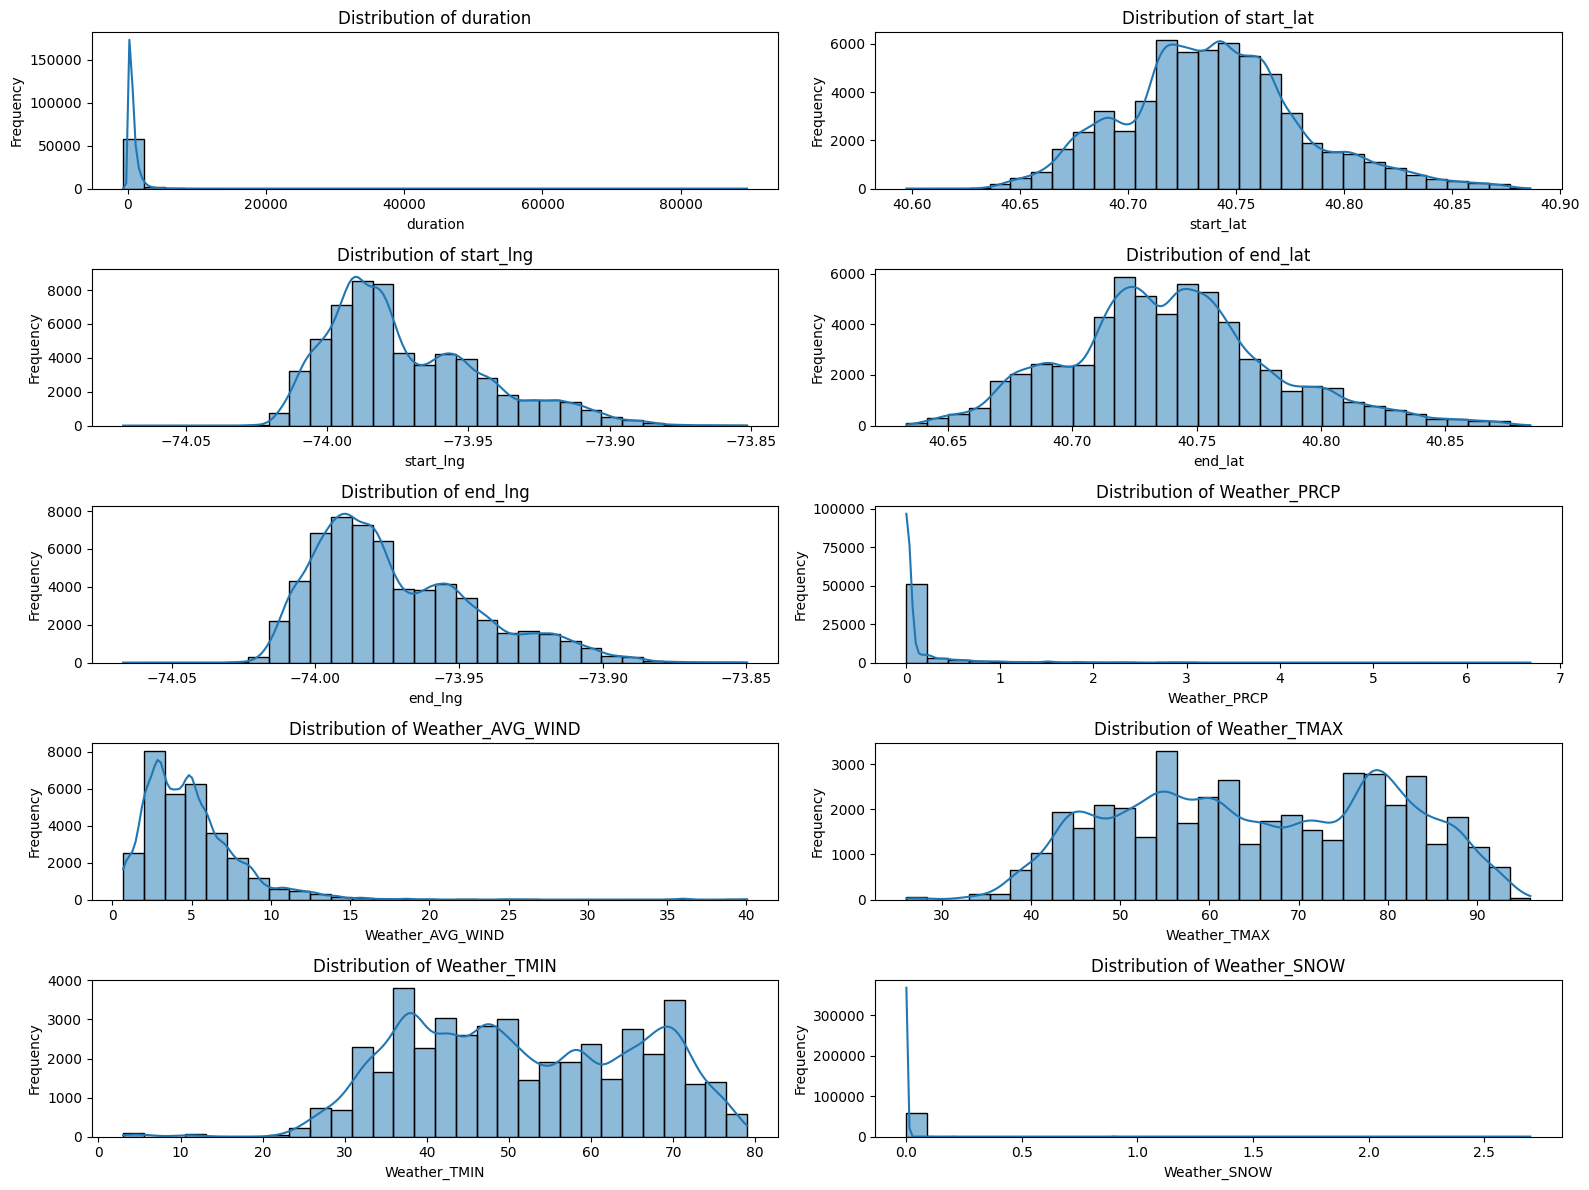

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(5, 2, i)
    sns.histplot(debug_dataset[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Categorical Features: Frequency Counts

In [ ]:
# Frequency counts for categorical features
categorical_columns = ['rideable_type', 'Month', 'Day_of_Week',
                       'start_station_name', 'end_station_name', 'member_casual']

print("Frequency Counts for Categorical Features:")
for col in categorical_columns:
    print(f"\n{col}:\n{debug_dataset[col].value_counts().head(10)}")  # Display top 10 for brevity

Frequency Counts for Categorical Features:

rideable_type:
rideable_type
electric_bike    30531
classic_bike     29469
Name: count, dtype: int64

Month:
Month
August      5003
May         5002
January     5001
February    5000
April       5000
October     5000
November    5000
December    5000
March       4999
June        4999
Name: count, dtype: int64

Day_of_Week:
Day_of_Week
Wednesday    9453
Thursday     9251
Friday       9002
Tuesday      8988
Monday       8054
Saturday     7777
Sunday       7475
Name: count, dtype: int64

start_station_name:
start_station_name
Broadway & W 58 St         236
W 21 St & 6 Ave            216
1 Ave & E 68 St            202
University Pl & E 14 St    202
E 33 St & 1 Ave            192
8 Ave & W 16 St            184
E 17 St & Broadway         182
West St & Chambers St      181
11 Ave & W 41 St           181
Broadway & E 21 St         176
Name: count, dtype: int64

end_station_name:
end_station_name
W 24 St & 7 Ave                  368
E 1 St & 1 Ave    

1. **Rideable Type**:
   - The dataset shows a nearly equal split between `electric_bike` (30,531 rides) and `classic_bike` (29,469 rides). This suggests both bike types are popular, with a slight preference for electric bikes, likely due to their convenience for longer trips.

2. **Month**:
   - The data appears evenly distributed across all months, with slight variations. August has the highest count (5,003 trips), suggesting it might have a marginally higher demand, possibly due to favorable summer weather.

3. **Day of the Week**:
   - Weekdays dominate ride usage, particularly Wednesday (9,453 trips) and Thursday (9,251 trips). In contrast, weekends (Saturday and Sunday) have fewer trips, indicating the system is more heavily used for commuting rather than recreational purposes.

4. **Start and End Stations**:
   - Popular start and end stations differ, with `Broadway & W 58 St` being the most common starting station, while `W 24 St & 7 Ave` is the most common destination. This suggests potential directional usage patterns or specific station-level popularity.

5. **Member vs. Casual Users**:
   - Members account for a significant majority of the rides (49,112 rides vs. 10,888 by casual users), highlighting that frequent users dominate the system. This may suggest that membership incentives successfully retain a loyal user base.

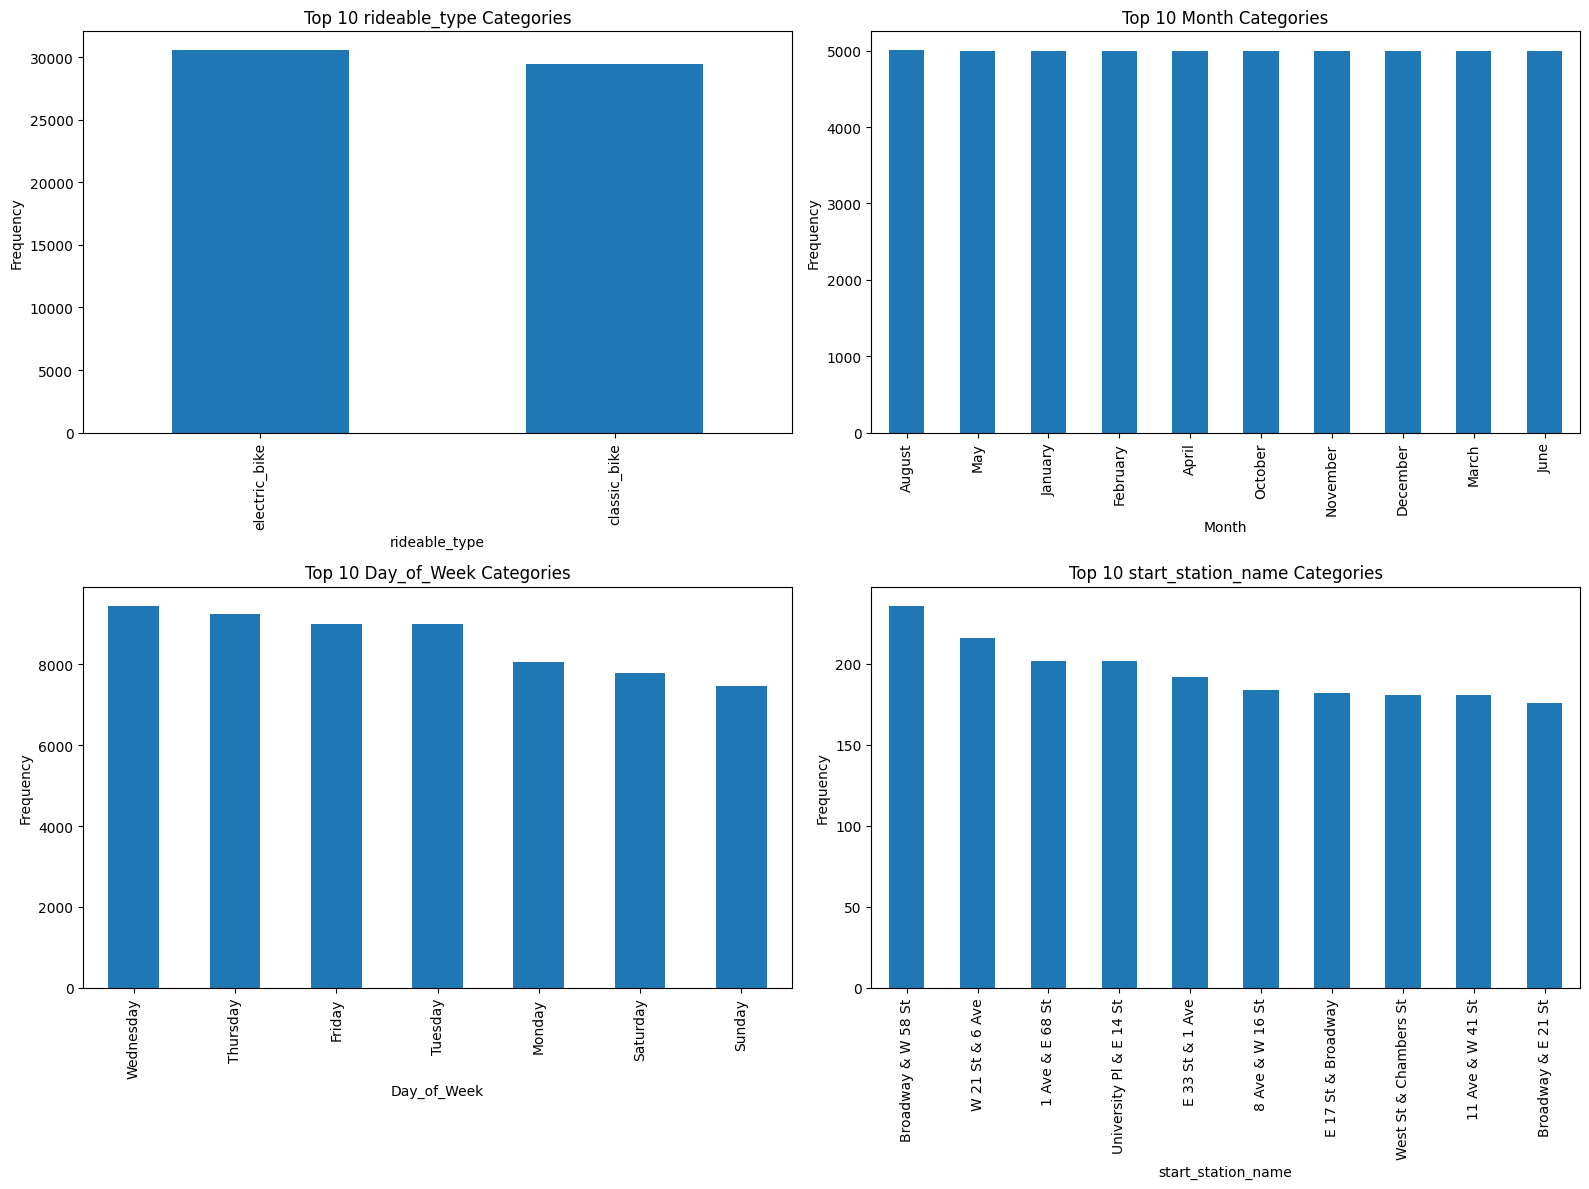

In [ ]:
# Bar plots for top categories
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_columns[:4], start=1):  # Focus on 4 key features
    plt.subplot(2, 2, i)
    debug_dataset[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 {col} Categories")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Target Variable Analysis (End Station Name)

In [ ]:
# Analyze the distribution of the target variable
print("Analysis of Target Variable: End Station Name")
display(debug_dataset['end_station_name'].value_counts().head(10))  # Display top 10 most frequent stations
print("\nNumber of Unique End Stations:", debug_dataset['end_station_name'].nunique())

Analysis of Target Variable: End Station Name


,count
end_station_name,
W 24 St & 7 Ave,368
E 1 St & 1 Ave,288
W 31 St & 7 Ave,279
Cleveland Pl & Spring St,261
E 77 St & 1 Ave,261
6 Ave & W 34 St,241
North Moore St & Greenwich St,238
Columbus Ave & W 72 St,232
E 48 St & 5 Ave,228



Number of Unique End Stations: 2008


The target variable, `end_station_name`, exhibits a high degree of variability with **2008 unique stations**, indicating a diverse set of destinations. The top 10 stations account for only a small fraction of the total trips (e.g., the most popular station, `W 24 St & 7 Ave`, has just 368 trips), highlighting significant label imbalance.

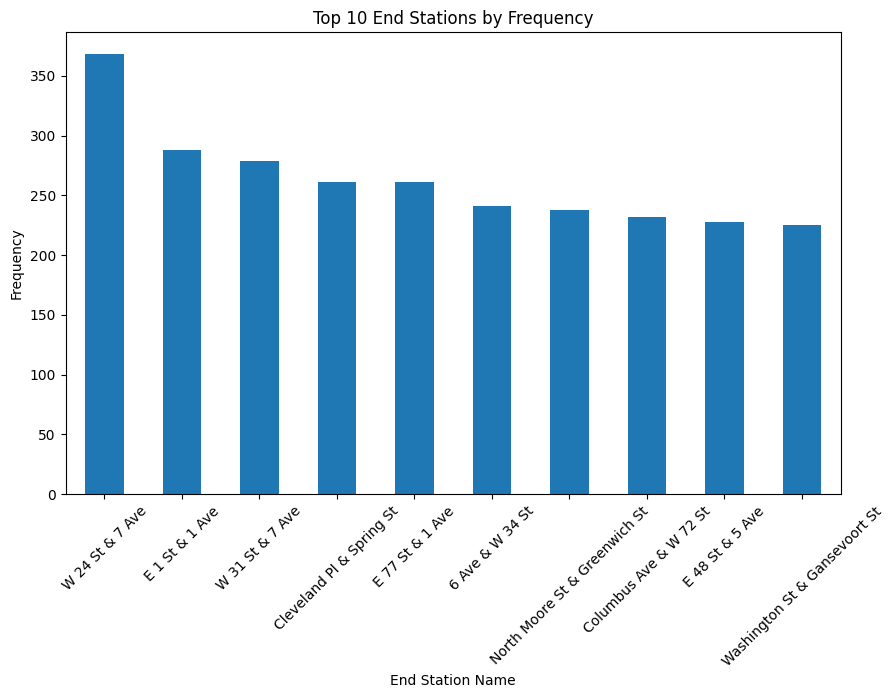

In [ ]:
# Visualize the top 10 end stations
plt.figure(figsize=(10, 6))
debug_dataset['end_station_name'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 End Stations by Frequency")
plt.xlabel("End Station Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

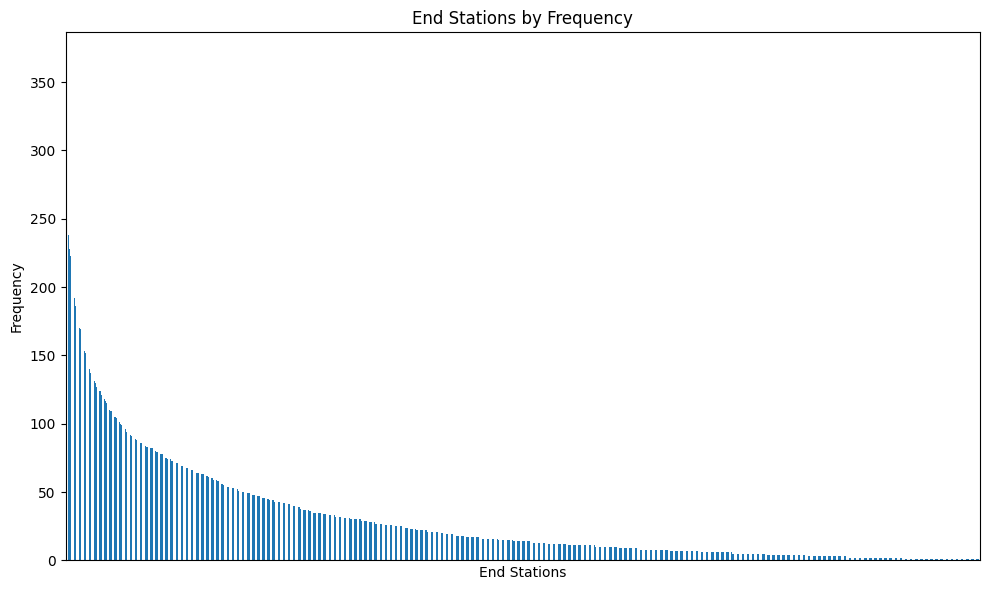

In [ ]:
# Visualize the frequency of end stations
plt.figure(figsize=(10, 6))
debug_dataset['end_station_name'].value_counts().plot(kind='bar')
plt.title("End Stations by Frequency")
plt.xlabel("End Stations")
plt.ylabel("Frequency")
plt.xticks([])
plt.tight_layout()
plt.show()

In [ ]:
end_station_counts = debug_dataset['end_station_name'].value_counts()
total_end_station_counts = end_station_counts.sum()
print(f"Total Value Counts of End Station Names: {total_end_station_counts}")

Total Value Counts of End Station Names: 60000


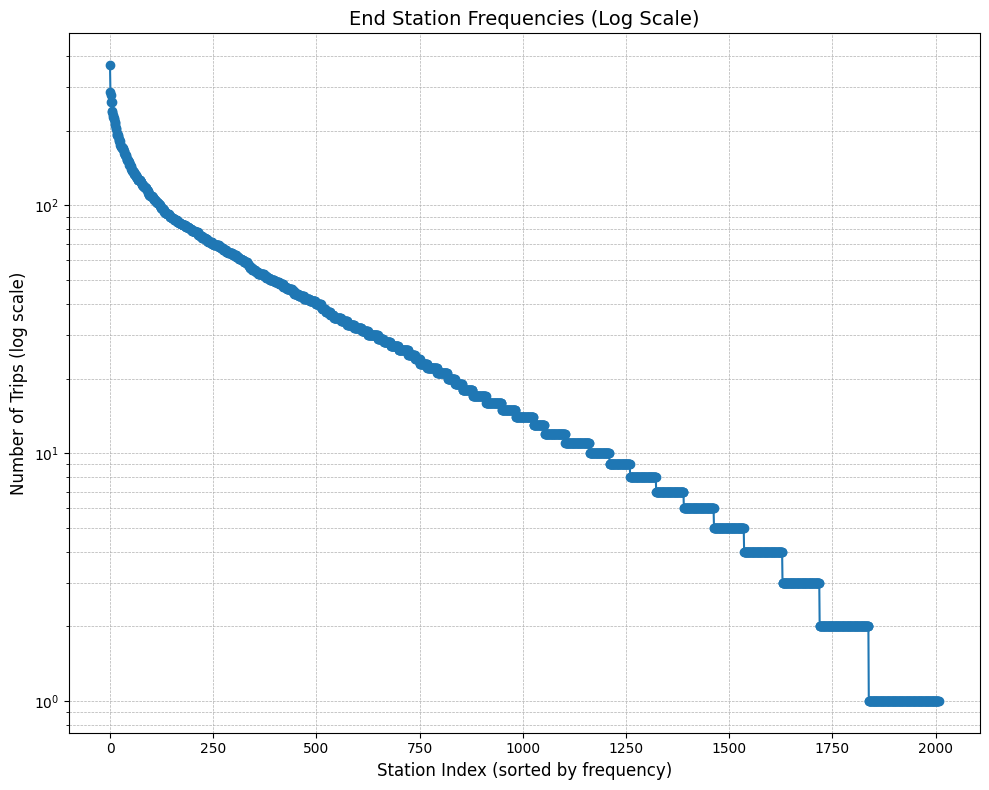

In [ ]:
# Plot the counts
plt.figure(figsize=(10, 8))
plt.plot(end_station_counts.values, marker='o')
plt.yscale('log') # Use a logarithmic scale to handle imbalance
plt.title("End Station Frequencies (Log Scale)", fontsize=14)
plt.xlabel("Station Index (sorted by frequency)", fontsize=12)
plt.ylabel("Number of Trips (log scale)", fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Check label imbalance: Calculate proportion of the top 10 stations
top_10_stations = debug_dataset['end_station_name'].value_counts().head(10)
imbalance_percentage = (top_10_stations.sum() / len(debug_dataset)) * 100
print(f"Top 10 stations account for {imbalance_percentage:.2f}% of all trips.")

Top 10 stations account for 4.37% of all trips.


## Correlation Analysis

### Correlation Between the Numerical Features

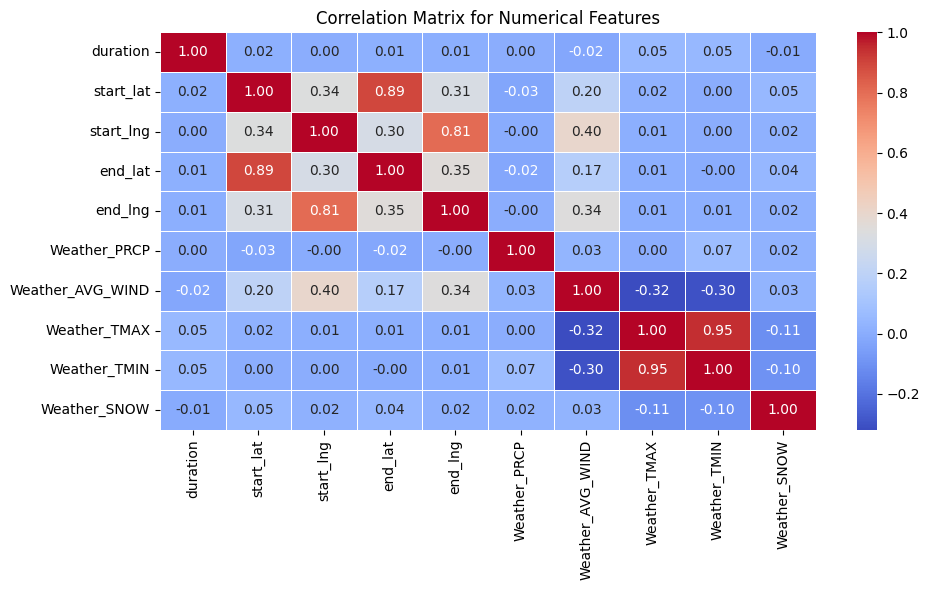

In [ ]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = debug_dataset[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.tight_layout()
plt.show()

1. **High Correlation Among Geospatial Features**:
   - `start_lat` and `end_lat` show a very strong positive correlation (**0.89**), as do `start_lng` and `end_lng` (**0.81**). This indicates that trips generally start and end in nearby locations.

2. **Minimal Correlation with Trip Duration**:
   - `duration` has very weak correlations with all features, indicating that trip length is not strongly influenced by starting/ending coordinates or weather conditions.

3. **Strong Relationship Between Weather Features**:
   - `Weather_TMAX` and `Weather_TMIN` have an almost perfect positive correlation (**0.95**), reflecting the expected seasonal variation where daily high and low temperatures are closely linked.

4. **Negligible Impact of Weather Precipitation and Snow**:
   - `Weather_PRCP` (precipitation) and `Weather_SNOW` show almost no correlation with other features, indicating they might have minimal direct impact on bike rental behaviors.

5. **Average Wind and Longitude Correlation**:
   - `Weather_AVG_WIND` shows moderate correlation with `start_lng` and `end_lng` (**0.40** and **0.34**, respectively). This could be related to regional patterns of wind across NYC.

Overall, the matrix highlights strong geospatial dependencies, but weather conditions (except temperature) do not appear to strongly influence the numerical variables in this dataset.

### Correlation Between the Target Attribute (end_station_name) and Numerical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable as numeric
label_encoder = LabelEncoder()
debug_dataset['end_station_encoded'] = label_encoder.fit_transform(debug_dataset['end_station_name'])

debug_dataset[['end_station_encoded', 'end_station_name']].value_counts()

,,count
end_station_encoded,end_station_name,
1830,W 24 St & 7 Ave,368
804,E 1 St & 1 Ave,288
1841,W 31 St & 7 Ave,279
698,Cleveland Pl & Spring St,261
989,E 77 St & 1 Ave,261
...,...,...
1656,St Marks Ave & Thomas S. Boyland St,1
250,49 Ave & 108 St,1
247,48 St & Barnett Ave,1


In [ ]:
# Correlation between the target and numerical features
correlation_numerical_with_target = debug_dataset[numerical_columns + ['end_station_encoded']].corr()['end_station_encoded'][:-1]
print("Correlation Between Target Attribute (End Station Name (encoded)) and Numerical Features:\n")
print(correlation_numerical_with_target)

Correlation Between Target Attribute (End Station Name (encoded)) and Numerical Features:

duration            0.001893
start_lat          -0.010504
start_lng          -0.122541
end_lat            -0.008625
end_lng            -0.165018
Weather_PRCP        0.005746
Weather_AVG_WIND   -0.091505
Weather_TMAX        0.022259
Weather_TMIN        0.023011
Weather_SNOW       -0.007001
Name: end_station_encoded, dtype: float64


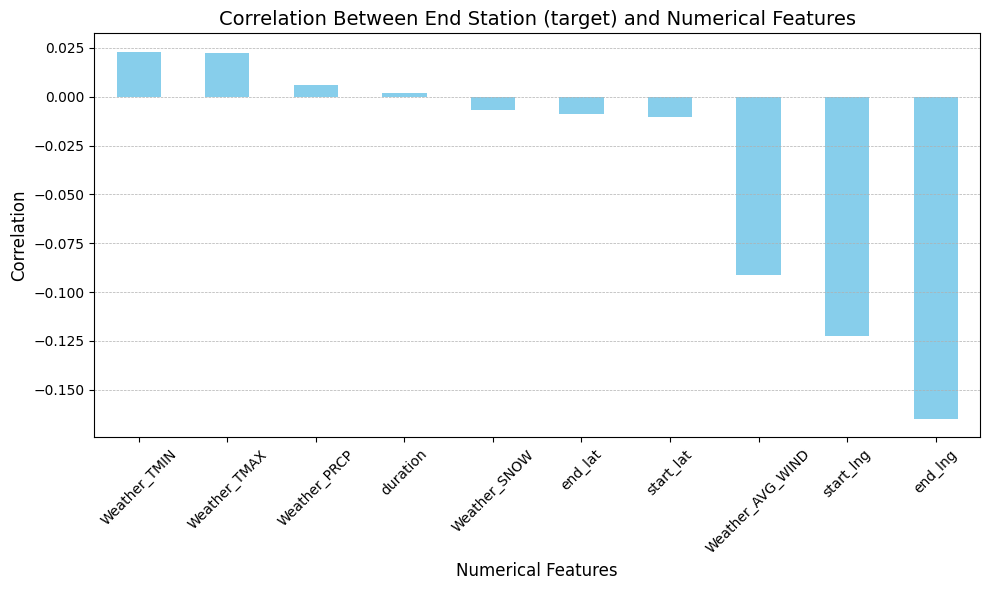

In [ ]:
# Plot correlations
plt.figure(figsize=(10, 6))
correlation_numerical_with_target.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Correlation Between End Station (target) and Numerical Features", fontsize=14)
plt.xlabel("Numerical Features", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

1. **Weak Correlations Across the Board**:
   - All numerical features have extremely weak correlations (close to 0) with the target variable (`end_station_name` encoded). This suggests that these numerical features alone may not strongly influence or predict the destination station.

2. **Longitude Features Show Slightly Stronger Correlations**:
   - `start_lng` (-0.12) and `end_lng` (-0.17) have slightly higher (though still weak) correlations with the target, implying that the geographic starting and ending longitude may have some impact on predicting the destination station.

3. **Weather Features Have Minimal Impact**:
   - Weather variables like `Weather_TMAX` (0.022), `Weather_TMIN` (0.023), and `Weather_AVG_WIND` (-0.09) show negligible correlations with the destination, suggesting that weather conditions might not significantly influence station selection.

4. **Duration's Negligible Correlation**:
   - The trip `duration` (0.0019) shows almost no correlation with the destination, which might indicate that trip length is independent of the specific end station chosen.

### Correlation Between Categorical Features

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    contingency_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_matrix)[0]
    n = contingency_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_matrix.shape) - 1)))

# Categorical features
categorical_columns = ['rideable_type', 'Month', 'Day_of_Week', 'start_station_name', 'end_station_name', 'member_casual']

# Compute Cramér's V matrix
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(debug_dataset[col1], debug_dataset[col2])

# Convert to float for heatmap plotting
cramers_v_matrix = cramers_v_matrix.astype(float)

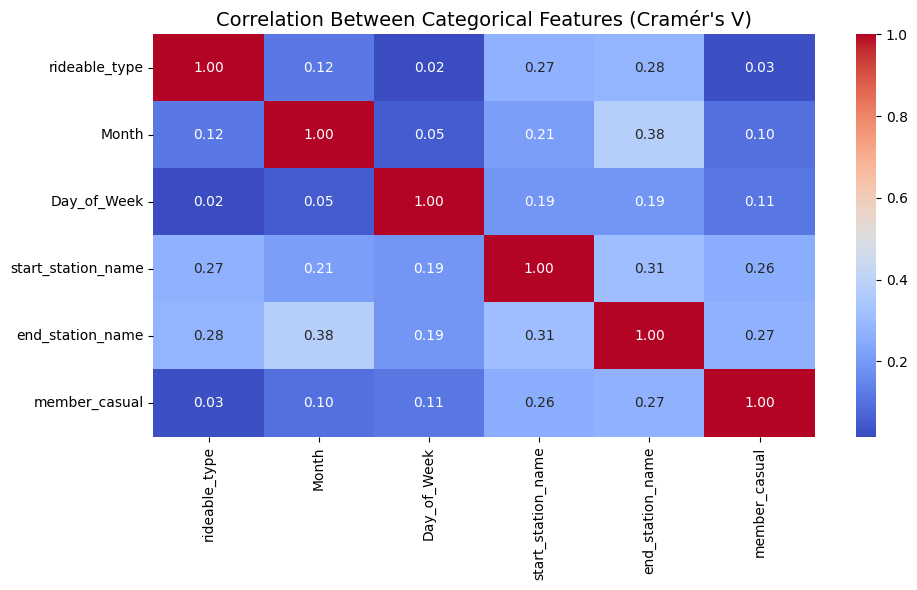

In [ ]:
# Visualize the categorical correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Categorical Features (Cramér's V)", fontsize=14)
plt.tight_layout()
plt.show()

Using Cramér's V for finding correlation between categorical variables:

1. **Start and End Stations Show Strong Correlation**:
   - `start_station_name` and `end_station_name` have a significant correlation (0.31), reflecting the natural relationship where nearby stations are often used for both start and end points.

2. **Month Correlates Moderately with End Stations**:
   - The correlation between `Month` and `end_station_name` (0.38) suggests that station popularity varies seasonally, likely influenced by weather, events, or commuting patterns.

3. **Rideable Type Has Low Correlation with Other Features**:
   - `rideable_type` shows weak correlations with other categorical features, indicating that the choice of bike type is relatively independent of factors like starting station, month, or user type.

4. **Member vs. Casual User Type Has Some Influence**:
   - `member_casual` has a moderate correlation with `start_station_name` (0.26) and `end_station_name` (0.27), which suggests that members and casual users may prefer different stations.

5. **Day of the Week Has Minimal Influence**:
   - `Day_of_Week` exhibits weak correlations across the board, indicating that the day of the week has a limited direct impact on station or user behavior patterns.

These correlations highlight the importance of geospatial and temporal features (like `start_station_name`, `Month`) in influencing destination stations, while other features like bike type and day of the week play a more subtle role.

More specifically, we have the following observations regarding the correlation of the caregorical features with the target label `end_station_name`:

1. The correlation between `end_station_name` (target) and `start_station_name` (0.31) suggests a strong relationship, indicating that the starting station significantly influences the destination.  

2. `Month` has a moderate correlation (0.38) with `end_station_name`, implying seasonal trends in station usage.  

3. `member_casual` has a smaller but notable correlation (0.27), showing that user type (member or casual) impacts destination preferences.  

4. `Day_of_Week` exhibits very weak correlation (0.19) with the target, suggesting that the day of the week has minimal influence on the choice of destination.  

5. The low correlation with `rideable_type` (0.28) indicates that bike type selection has limited impact on determining the end station.  

In [ ]:
# Compute Cramér's V between each categorical feature and the target
categorical_correlation_with_target = {}

for col in categorical_columns:
    if col != 'end_station_name':  # Avoid comparing target with itself
        categorical_correlation_with_target[col] = cramers_v(debug_dataset[col], debug_dataset['end_station_name'])

# Convert to a pandas Series for better display
categorical_correlation_with_target = pd.Series(categorical_correlation_with_target, name="Correlation with Target (Cramér's V)")
print("Correlation Between Categorical Features and End Station Name (Target) (using Cramér's V):")
print(categorical_correlation_with_target)

Correlation Between Categorical Features and End Station Name (Target) (using Cramér's V):
rideable_type         0.278789
Month                 0.378874
Day_of_Week           0.189319
start_station_name    0.310610
member_casual         0.267014
Name: Correlation with Target (Cramér's V), dtype: float64


In [ ]:
# Combine numerical and categorical correlations
correlation_combined = pd.concat(
    [correlation_numerical_with_target.rename("Numerical Features"),
     categorical_correlation_with_target.rename("Categorical Features")],
    axis=0
).sort_values(ascending=False)

# Display combined correlations
print("Combined Correlation Between Features and Target:\n")
print(correlation_combined)

# Highlight the top 5 features most correlated with the target
print("\n\n\nTop 5 Features Most Correlated with Target:\n")
print(correlation_combined.head(5))

Combined Correlation Between Features and Target:

Month                 0.378874
start_station_name    0.310610
rideable_type         0.278789
member_casual         0.267014
Day_of_Week           0.189319
Weather_TMIN          0.023011
Weather_TMAX          0.022259
Weather_PRCP          0.005746
duration              0.001893
Weather_SNOW         -0.007001
end_lat              -0.008625
start_lat            -0.010504
Weather_AVG_WIND     -0.091505
start_lng            -0.122541
end_lng              -0.165018
dtype: float64



Top 5 Features Most Correlated with Target:

Month                 0.378874
start_station_name    0.310610
rideable_type         0.278789
member_casual         0.267014
Day_of_Week           0.189319
dtype: float64


The top 5 most correlated features with the target are **Month (categorical)**, **start_station_name (categorical)**, **rideable_type (categorical)**, **member_casual (categorical)**, and **Day_of_Week (categorical)**. All of these features are categorical.

# Other Data Visualizations (Temporal Patterns and Geospatial Analysis)

## Temporal Patterns: Trends by Month and Day of the Week

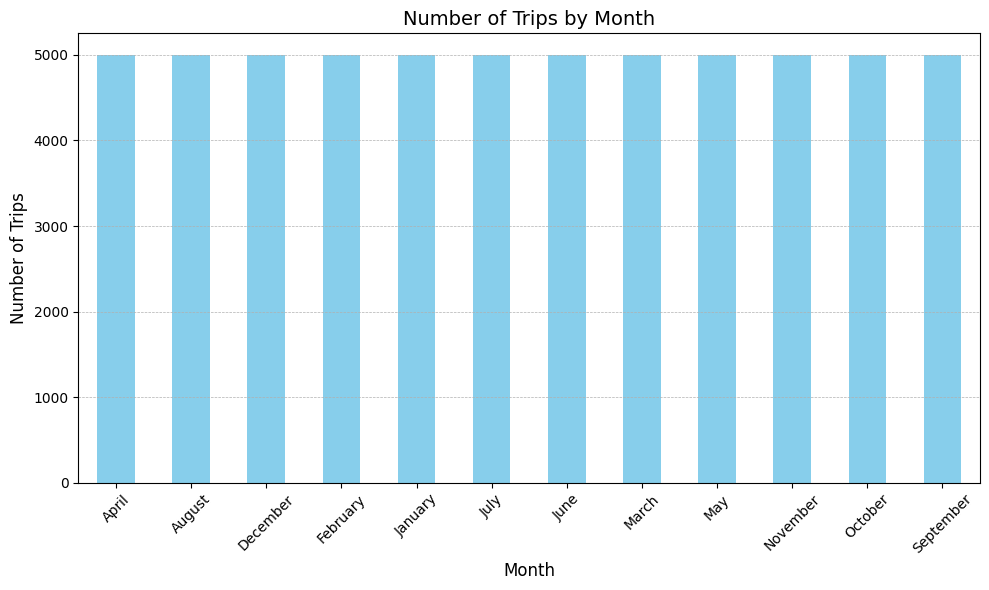

In [ ]:
# Count trips by Month
monthly_counts = debug_dataset['Month'].value_counts().sort_index()

# Bar plot for trends by Month
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Trips by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

The number of trips is nearly identical across all months, with approximately 5,000 trips per month, indicating a balanced dataset with respect to temporal distribution.

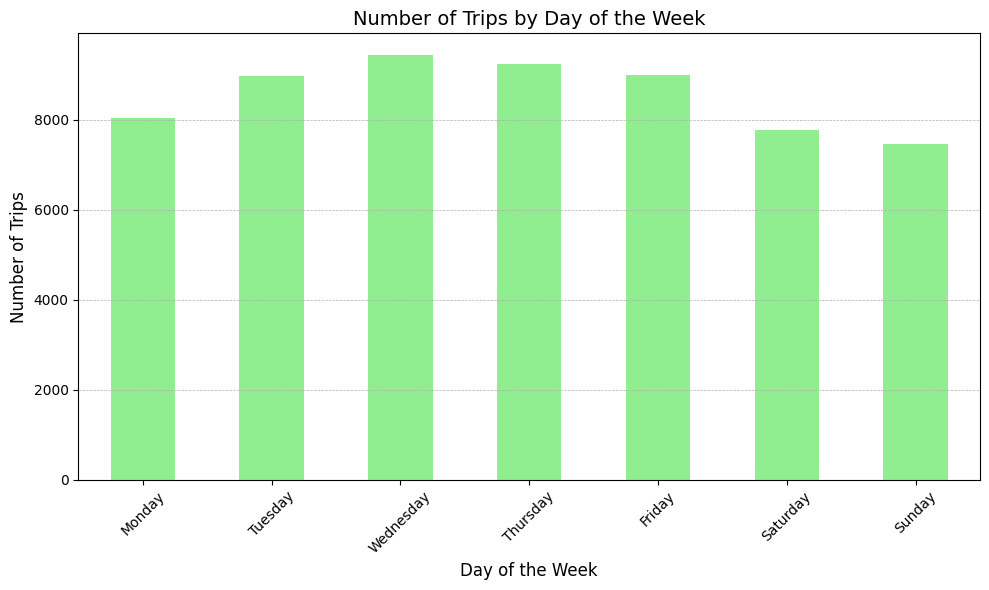

In [ ]:
# Count trips by Day of the Week
day_of_week_counts = debug_dataset['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Bar plot for trends by Day of the Week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='lightgreen')
plt.title("Number of Trips by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Trips are more frequent on weekdays, with Wednesday and Thursday showing the highest counts, suggesting that the system is heavily used for commuting purposes. Trip numbers drop significantly on weekends, indicating less usage for recreational activities compared to workdays.

## Geospatial Analysis: Scatterplots of Start and End Latitude/Longitude

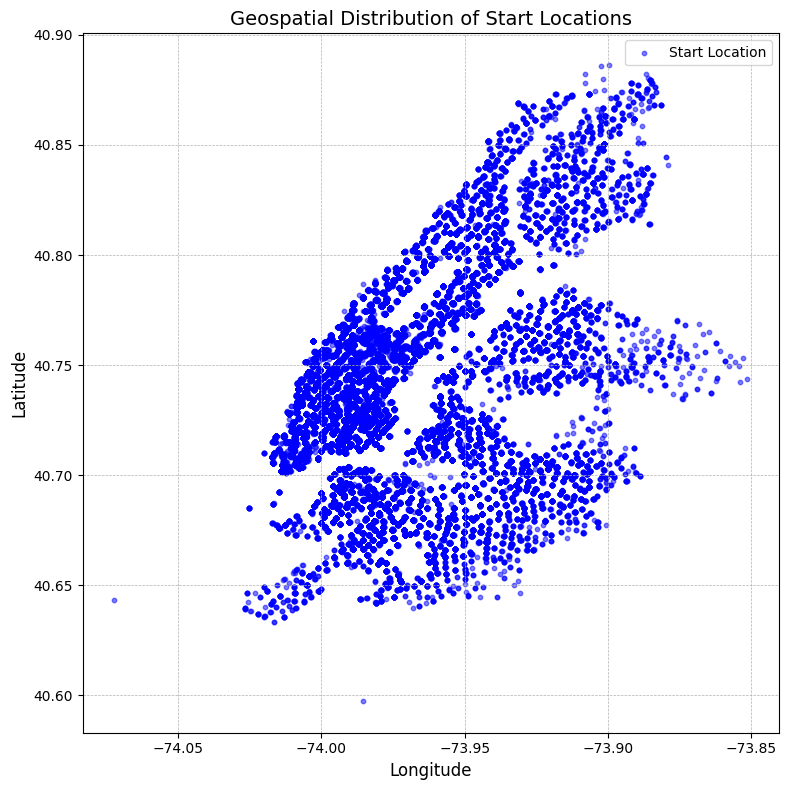

In [ ]:
# Scatter plot of Start Latitude and Longitude
plt.figure(figsize=(8, 8))
plt.scatter(debug_dataset['start_lng'], debug_dataset['start_lat'], alpha=0.5, c='blue', s=10, label='Start Location')
plt.title("Geospatial Distribution of Start Locations", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

The geospatial distribution of start locations is densely concentrated in the **central and southern parts of Manhattan** (*latitude ~40.70–40.85, longitude ~-74.00 to -73.90*), with additional clusters in nearby boroughs like **Brooklyn** (*latitude ~40.60–40.70, longitude ~-74.05 to -73.90*) and **Queens** (*latitude ~40.70–40.80, longitude ~-73.90 to -73.85*). This pattern indicates that the Bike system is predominantly used in **urban areas with high population density and business activity**. Outliers in the plot suggest occasional use in **less urbanized or peripheral locations** outside these zones.


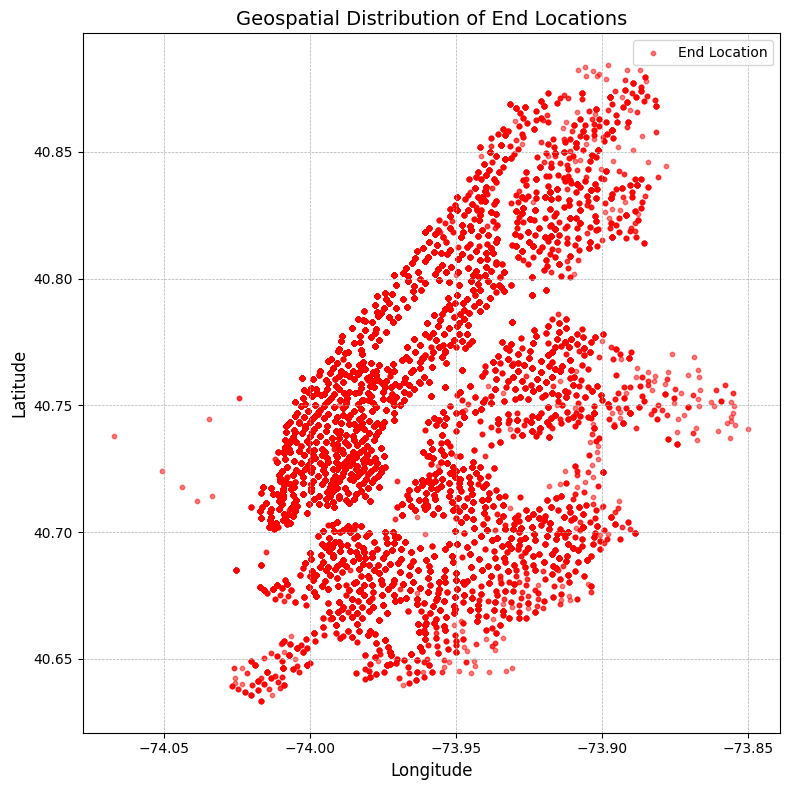

In [ ]:
# Scatter plot of End Latitude and Longitude
plt.figure(figsize=(8, 8))
plt.scatter(debug_dataset['end_lng'], debug_dataset['end_lat'], alpha=0.5, c='red', s=10, label='End Location')
plt.title("Geospatial Distribution of End Locations", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

The geospatial distribution of end locations closely mirrors the distribution of start locations, with dense clusters in the **central and southern parts of Manhattan** (*latitude ~40.70–40.85, longitude ~-74.00 to -73.90*), **Brooklyn** (*latitude ~40.60–40.70, longitude ~-74.05 to -73.90*), and **Queens** (*latitude ~40.70–40.80, longitude ~-73.90 to -73.85*). This indicates that trips often start and end in **similar high-demand urban areas, reflecting a commuting or localized usage pattern**. Outliers suggest occasional trips terminating in **peripheral or less urbanized regions**.

# Missing Data Handling

Summary of Missing Data:
                  Missing Values  Percentage (%)
Weather_AVG_WIND           28720       47.866667
Weather_TMAX               15910       26.516667
Weather_TMIN               15844       26.406667
Weather_SNOW                1652        2.753333
Weather_PRCP                 456        0.760000


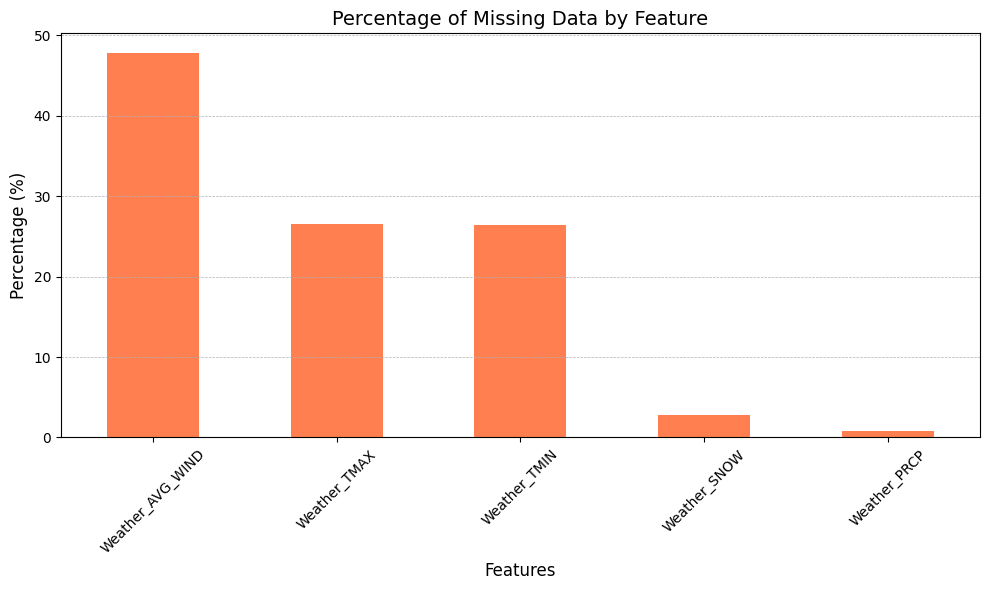

In [ ]:
# Quantify missing values
missing_data = debug_dataset.isnull().sum()
missing_percentage = (missing_data / len(debug_dataset)) * 100

# Combine into a DataFrame for better display
missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage (%)': missing_percentage})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

# Display missing data summary
print("Summary of Missing Data:")
print(missing_summary)

# Visualize missing data
plt.figure(figsize=(10, 6))
missing_summary['Percentage (%)'].plot(kind='bar', color='coral')
plt.title("Percentage of Missing Data by Feature", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Several features have missing data:
- `Weather_AVG_WIND` (48%), `Weather_TMAX` (27%), and `Weather_TMIN` (~26%) had significant missing data.
- `Weather_SNOW` and `Weather_PRCP` had minimal missing data (<5%).


In [ ]:
# Handling Strategies

# Weather_AVG_WIND has ~48% missing; consider imputing with median
debug_dataset['Weather_AVG_WIND'] = debug_dataset['Weather_AVG_WIND'].fillna(debug_dataset['Weather_AVG_WIND'].median())

# Weather_TMAX and Weather_TMIN have ~26% missing; impute with median
debug_dataset['Weather_TMAX'] = debug_dataset['Weather_TMAX'].fillna(debug_dataset['Weather_TMAX'].median())
debug_dataset['Weather_TMIN'] = debug_dataset['Weather_TMIN'].fillna(debug_dataset['Weather_TMIN'].median())

# Weather_SNOW and Weather_PRCP have minimal missing values (<5%); drop rows with missing values
debug_dataset.dropna(subset=['Weather_PRCP', 'Weather_SNOW'], inplace=True)

# Confirm missing data is handled
print("Missing Data After Handling:")
print(debug_dataset.isnull().sum())

Missing Data After Handling:
rideable_type          0
started_at             0
Month                  0
Day_of_Week            0
Exact_start_Time       0
ended_at               0
duration               0
start_station_name     0
end_station_name       0
start_lat              0
start_lng              0
end_lat                0
end_lng                0
member_casual          0
Weather_PRCP           0
Weather_AVG_WIND       0
Weather_TMAX           0
Weather_TMIN           0
Weather_SNOW           0
end_station_encoded    0
dtype: int64



**Handling Strategy**:
- For `Weather_AVG_WIND`, `Weather_TMAX`, and `Weather_TMIN`, missing values were imputed with their respective medians to preserve the data distribution and avoid skewing the dataset.
- For `Weather_SNOW` and `Weather_PRCP`, rows with missing data were dropped as the percentage of missing values was minimal, and imputation was not critical.

**Reasoning**:
- **Imputation with Median**: Median was chosen for features with significant missing data as it is robust to outliers and preserves central tendencies.
- **Dropping Rows**: Dropping rows for features with minimal missing data (<5%) is a simple and effective approach to retain dataset integrity.

#  Bias and Imbalance Analysis

## Label Bias: Target Variable

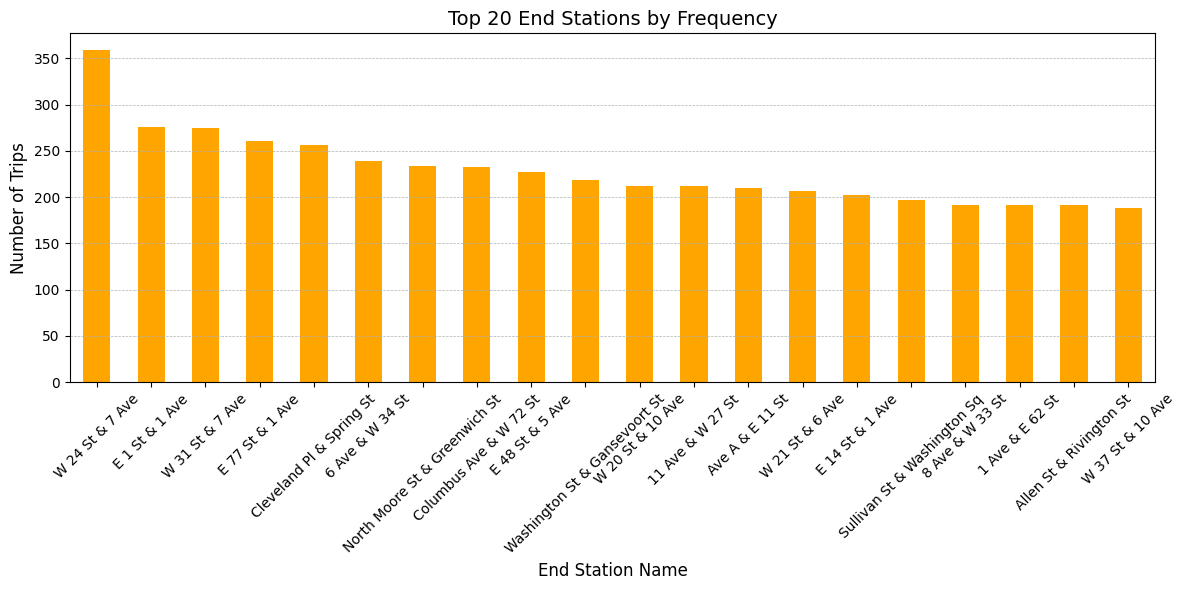

In [ ]:
# Distribution of the target variable
end_station_counts = debug_dataset['end_station_name'].value_counts()

# Plot the distribution of target variable
plt.figure(figsize=(12, 6))
end_station_counts.head(20).plot(kind='bar', color='orange')
plt.title("Top 20 End Stations by Frequency", fontsize=14)
plt.xlabel("End Station Name", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate imbalance
print("Top 10 End Stations Account for:")
print(f"{end_station_counts.head(10).sum() / end_station_counts.sum() * 100:.2f}% of total trips.")

Top 10 End Stations Account for:
4.42% of total trips.


In [ ]:
# Identify underrepresented stations (setting threshold as 5)
underrepresented_threshold = 5
underrepresented_stations = end_station_counts[end_station_counts <= underrepresented_threshold]
print(f"Number of Underrepresented Stations (<= {underrepresented_threshold} trips): {len(underrepresented_stations)}")
print(f"Proportion of Underrepresented Stations: {len(underrepresented_stations) / len(end_station_counts) * 100:.2f}%")

Number of Underrepresented Stations (<= 5 trips): 557
Proportion of Underrepresented Stations: 27.96%


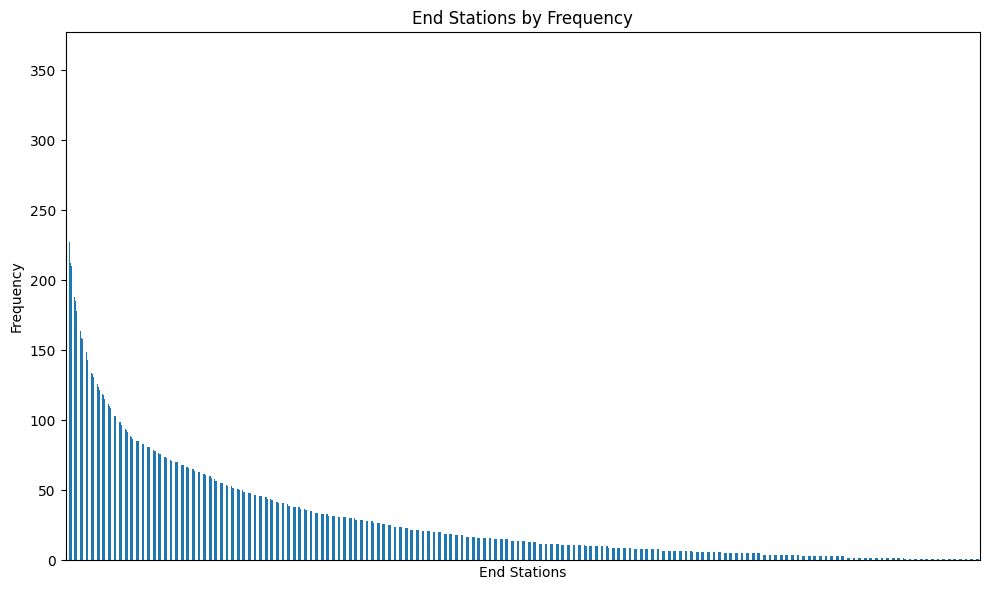

In [ ]:
# Visualize the frequency of end stations
plt.figure(figsize=(10, 6))
debug_dataset['end_station_name'].value_counts().plot(kind='bar')
plt.title("End Stations by Frequency")
plt.xlabel("End Stations")
plt.ylabel("Frequency")
plt.xticks([])
plt.tight_layout()
plt.show()

The top 10 end stations account for only **4.42% of total trips**, indicating a highly diverse distribution of trip destinations with no significant dominance of a few stations. Additionally, a large number of **underrepresented stations (557)** have **5 or fewer trips**, making up **27.96% of all stations**. This highlights significant class imbalance in the target variable, with a long tail of rarely used stations. Such imbalance could pose challenges during modeling, requiring strategies like oversampling, class weighting, or grouping underrepresented stations into broader categories.

## Feature Imbalance: Categorical Features


Feature: rideable_type
rideable_type
electric_bike    0.508466
classic_bike     0.491534
Name: proportion, dtype: float64


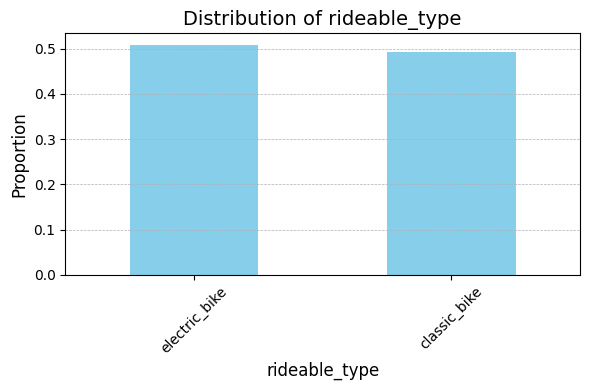


Feature: Month
Month
April        0.085433
November     0.085176
August       0.085022
March        0.084696
October      0.083975
December     0.083855
September    0.083804
July         0.082877
June         0.082174
May          0.081573
Name: proportion, dtype: float64


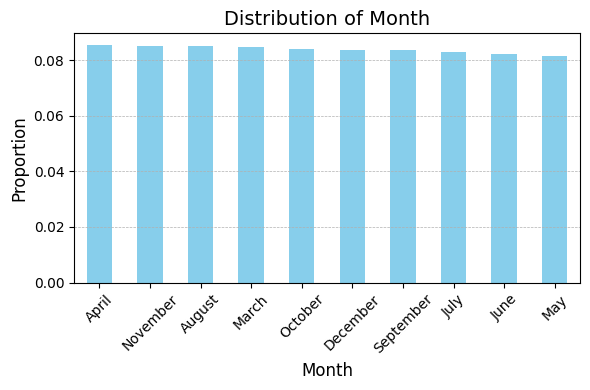


Feature: Day_of_Week
Day_of_Week
Wednesday    0.156525
Thursday     0.154586
Friday       0.152459
Tuesday      0.147742
Monday       0.133485
Saturday     0.130226
Sunday       0.124976
Name: proportion, dtype: float64


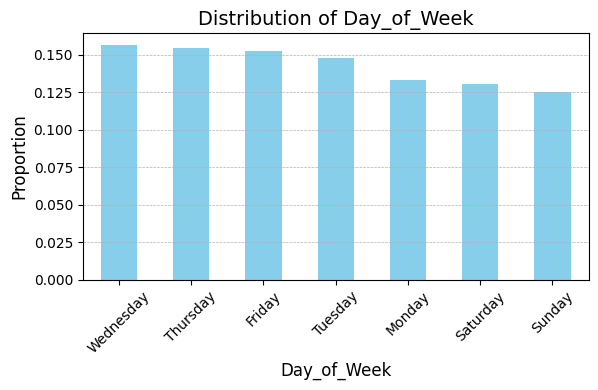


Feature: start_station_name
start_station_name
Broadway & W 58 St         0.004049
W 21 St & 6 Ave            0.003517
1 Ave & E 68 St            0.003465
University Pl & E 14 St    0.003362
E 33 St & 1 Ave            0.003294
11 Ave & W 41 St           0.003105
8 Ave & W 16 St            0.003088
E 17 St & Broadway         0.003019
West St & Chambers St      0.003019
Broadway & E 21 St         0.002882
Name: proportion, dtype: float64


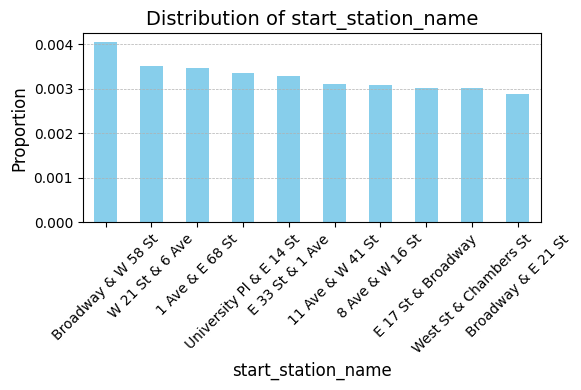


Feature: member_casual
member_casual
member    0.818154
casual    0.181846
Name: proportion, dtype: float64


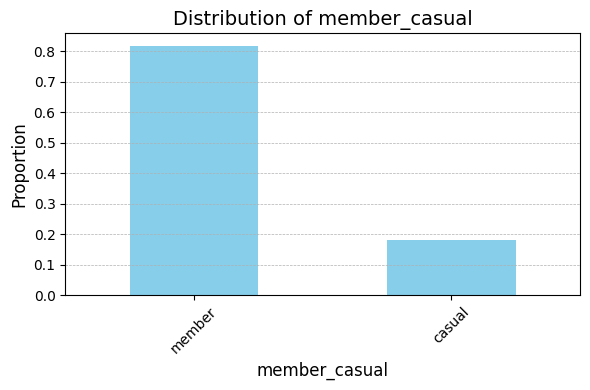

In [ ]:
# Imbalance in categorical features
categorical_columns = ['rideable_type', 'Month', 'Day_of_Week', 'start_station_name', 'member_casual']

for col in categorical_columns:
    print(f"\nFeature: {col}")
    print(debug_dataset[col].value_counts(normalize=True).head(10))  # Top 10 categories with their proportions

    # Plot feature imbalance
    plt.figure(figsize=(6, 4))
    debug_dataset[col].value_counts(normalize=True).head(10).plot(kind='bar', color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

The feature **`rideable_type`** is almost evenly distributed, with **electric bikes (50.85%)** slightly outpacing **classic bikes (49.15%)**, indicating balanced usage across bike types. The **`Month`** feature is uniformly distributed across the dataset, with minor variations, showing that trips are well-sampled throughout the year. For **`Day_of_Week`**, weekdays dominate usage, with **Wednesday (15.65%)** and **Thursday (15.46%)** being the most popular, while weekends see lower activity, reflecting a commuting pattern. The **`start_station_name`** distribution is highly imbalanced, with the most popular station, **Broadway & W 58 St**, accounting for only **0.40%** of trips, highlighting the long tail of less commonly used stations. Lastly, the **`member_casual`** feature is heavily skewed, with **members (81.82%)** significantly outnumbering casual users, emphasizing that the system is primarily utilized by frequent riders.

# Sparsity Issues

Sparsity in Numerical Features (Percentage of Zeros):
duration             0.000000
start_lat            0.000000
start_lng            0.000000
end_lat              0.000000
end_lng              0.000000
Weather_PRCP        69.954195
Weather_AVG_WIND     0.000000
Weather_TMAX         0.000000
Weather_TMIN         0.000000
Weather_SNOW        99.406426
dtype: float64


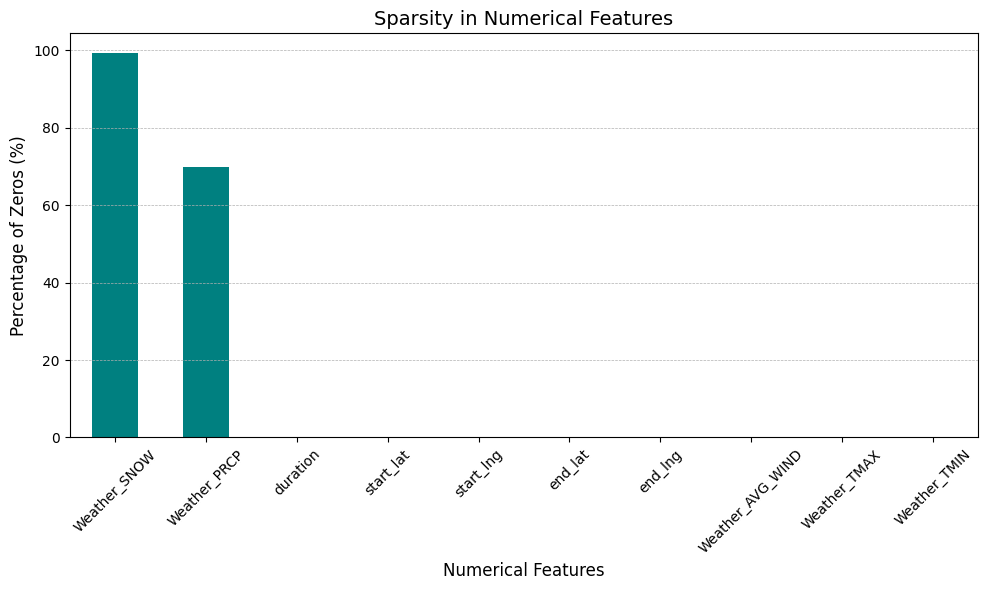

In [ ]:
# Calculate sparsity for numerical features (proportion of zeros)
numerical_sparsity = debug_dataset[numerical_columns].apply(lambda col: (col == 0).sum() / len(col) * 100)

# Display sparse features
print("Sparsity in Numerical Features (Percentage of Zeros):")
print(numerical_sparsity)

# Visualize sparsity
plt.figure(figsize=(10, 6))
numerical_sparsity.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Sparsity in Numerical Features", fontsize=14)
plt.xlabel("Numerical Features", fontsize=12)
plt.ylabel("Percentage of Zeros (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

1. **High Sparsity in Weather Features**:
   - **`Weather_SNOW`** has an extremely high sparsity of **99.41%**, reflecting the rarity of snow events in NYC.
   - **`Weather_PRCP`** shows a sparsity of **69.95%**, indicating that precipitation is absent in a majority of cases.

2. **Non-Sparse Features**:
   - Features like **`duration`**, **`start_lat`**, **`start_lng`**, **`end_lat`**, **`end_lng`**, and others show no sparsity, ensuring they provide consistent information across the dataset.

3. **Impact**:
   - Sparse features like `Weather_SNOW` and `Weather_PRCP` may hold critical information during rare events (e.g., snowfall affecting trip patterns), but their sparse nature could lead to lower importance during modeling.However, since these features do not significantly impact model performance (as their correlation with the target variable is extremely low), they can be excluded after feature selection or testing.

# Summary and Influence

#### **Key Takeaways**:
1. **Popular Destinations and Station Patterns**:
   - The target variable, `end_station_name`, exhibits a significant class imbalance, with the top 10 stations accounting for only **4.42% of trips**, and **27.96% of stations are underrepresented** (≤ 5 trips).
   - Geospatial analysis shows trips are concentrated in urban areas like **central and southern Manhattan** and parts of **Brooklyn** and **Queens**.
2. **Temporal Patterns**:
   - Weekdays dominate usage, especially Wednesday and Thursday, suggesting heavy reliance on the system for commuting.
   - Trip distribution across months is uniform, indicating consistent usage throughout the year.
3. **Feature Trends**:
   - `rideable_type` is evenly split between **electric bikes (50.85%)** and **classic bikes (49.15%)**.
   - The system is primarily used by **members (81.82%)** rather than casual users, reflecting loyalty or subscription-based usage.

---

#### **Data Challenges**:
1. **Class Imbalance**:
   - A long tail of rarely used end stations poses challenges for modeling, requiring techniques like **oversampling, class weighting, or station grouping**.
2. **Sparsity**:
   - High sparsity in `Weather_SNOW` (99.41%) and `Weather_PRCP` (69.95%) may reduce their utility unless handled carefully (e.g., binary encoding or dimensionality reduction).
3. **Missing Data**:
   - Weather-related features (`Weather_AVG_WIND`, `Weather_TMAX`, `Weather_TMIN`) had missing values, which were handled via **median imputation**.
4. **Temporal Bias**:
   - Strong weekday dominance could skew predictions, necessitating balanced representation or stratified validation.